In [1]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20

plt.rcParams['xtick.major.size'] = 18
plt.rcParams['ytick.major.size'] = 18
plt.rc('legend', fontsize=20)
import seaborn as sns
import pandas as pd

<AxesSubplot:ylabel=' power.draw [W]'>

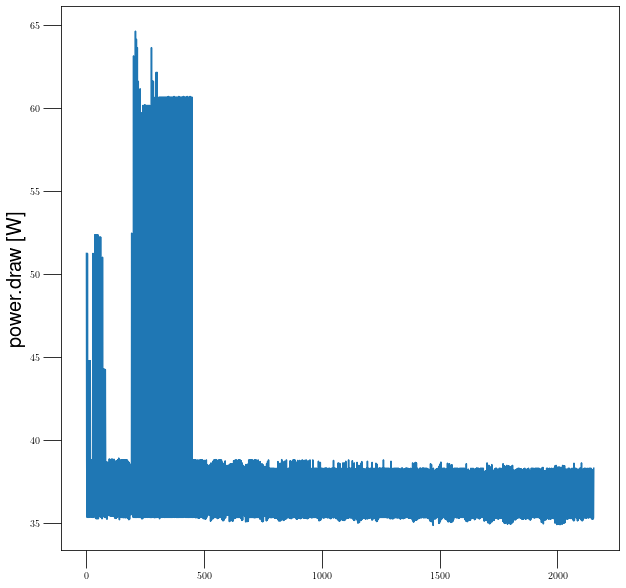

In [2]:
molform_1k_df = pd.read_csv("/g/g13/jones289/workspace/hd-cuda-master/hdpy/molformer_nvidia-smi_output_1k.csv")
f, ax = plt.subplots(1,1, figsize=(10,10))
molform_1k_df[' power.draw [W]'] = molform_1k_df[' power.draw [W]'].apply(lambda x: float(x.split(" ")[1]))
sns.lineplot(x=list(range(len(molform_1k_df))), y=molform_1k_df[' power.draw [W]'], ax=ax)
# print(molform_1k_df[' power.draw [W]'].apply(lambda x: float(x.split(" ")[1])).mean())
# molform_1k_df[' power.draw [W]'].apply(lambda x: float(x.split(" ")[1]))

In [3]:
molform_1k_df[' power.draw [W]'].iloc[250:].mean()

36.755606299212594

36.635512060102805


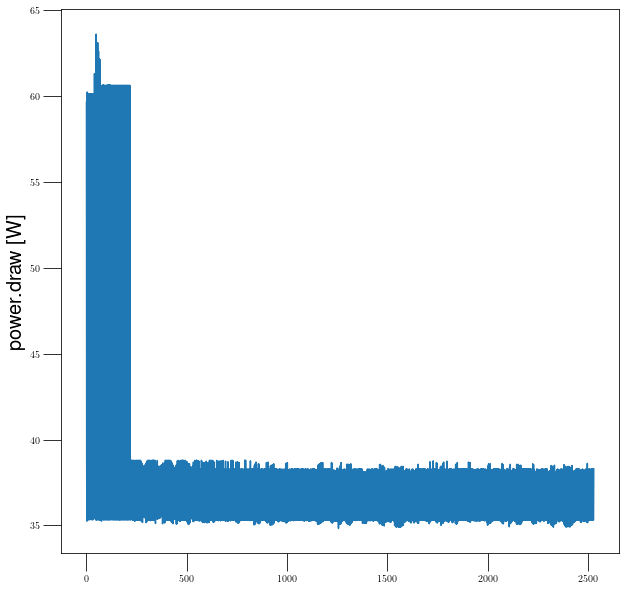

In [4]:
molform_10k_df = pd.read_csv("/g/g13/jones289/workspace/hd-cuda-master/hdpy/molformer_nvidia-smi_output_10k.csv")
f, ax = plt.subplots(1,1, figsize=(10,10))
sns.lineplot(x=list(range(len(molform_10k_df))), y=molform_10k_df[' power.draw [W]'].apply(lambda x: float(x.split(" ")[1])), ax=ax)
print(molform_10k_df[' power.draw [W]'].apply(lambda x: float(x.split(" ")[1])).mean())


(FPGA)
(GPU)
(FPGA)
(GPU)
(GPU)


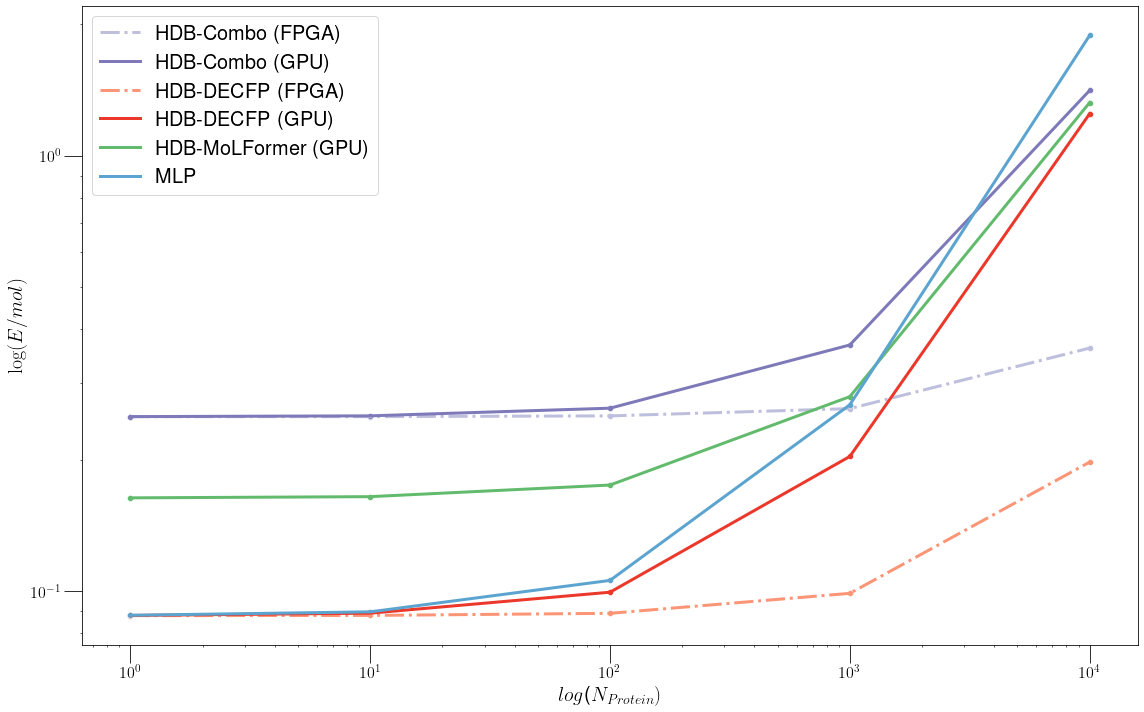

In [9]:
green_color_pal = sns.color_palette("Greens", 10)
blue_color_pal = sns.color_palette("Blues", 10)
red_color_pal = sns.color_palette("Reds", 10)
purple_color_pal = sns.color_palette("Purples", 10)
# rocket_color_pal = sns.color_palette("rocket", 10)



color_dict = {
            # "HDB-RPFP (1k) (FPGA)": green_color_pal[3],
            # "HDB-RPFP (1k) (GPU)": green_color_pal[5],
            ## "HDB-RPFP (10k) (GPU)": green_color_pal[8], 
            "MLP-small": blue_color_pal[5],
            # "MLP-large": blue_color_pal[7],
            "HDB-Combo (1k) (FPGA)": purple_color_pal[3],
            "HDB-Combo (1k) (GPU)":  purple_color_pal[6],
            ## "HDB-Combo (10k) (GPU)": purple_color_pal[9],
            "HDB-DECFP (1k) (FPGA)": red_color_pal[3],
            "HDB-DECFP (1k) (GPU)": red_color_pal[6],
            ## "HDB-DECFP (10k) (GPU)": red_color_pal[7]
            "HDB-MoLFormer (1k) (FPGA)": green_color_pal[4],
            "HDB-MoLFormer (1k) (GPU)": green_color_pal[9]
    }




def main():
    df = pd.read_csv("energy.csv", sep="\t")

    # import pdb
    # pdb.set_trace()

    col_list = ["1", "10", "100", "1000", "10000"]
    f, ax = plt.subplots(1,1, figsize=(16,10))
    # ax.set_xscale("log")
    # f.clf()

    for model, model_df in df.groupby("Model"):

        if model in color_dict.keys():
            x = [int(x) for x in col_list]
            y = model_df[col_list].values.reshape(-1)
            
            color = color_dict[model]

            device= "GPU"
            linestyle = "-"
            label=None
            if "mlp" not in model.lower():
                label = model.replace("(1k)", "")
                device = model.split(" ")[-1]
                print(device)
                if "FPGA" in device:
                    linestyle = "-."
            else:
                label = "MLP"
            linewidth=3
            sns.lineplot(x=x, y=y, label=label, ax=ax, markers="x", color=color, linestyle=linestyle, linewidth=linewidth)
            sns.scatterplot(x=x, y=y, ax=ax, color=color)



    ax.set_yscale("log")
    ax.set_xscale("log")
    ax.set_ylabel("$\log(E/{mol})$")
    ax.set_xlabel("$log$($N_{Protein})$")

    ax.xaxis.set_tick_params(labelsize=16)
    ax.yaxis.set_tick_params(labelsize=16)

    plt.tight_layout()
    plt.savefig("hdbind_energy.png", dpi=450)
main()